**Import required libraries and modules**
________________________________________________________________________________

In [138]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

**Read the data**

In [90]:
data = pd.read_csv('/content/marketing_campaign.csv', sep='\t', 
                   index_col='ID', 
                   parse_dates=['Dt_Customer'])

In [91]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,5,0,0,0,0,0,0,3,11,0
4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,...,7,0,0,0,1,0,0,3,11,0
7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,6,0,1,0,0,0,0,3,11,0


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-

In [93]:
data.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [94]:
data.drop(columns=['Z_Revenue', 'Z_CostContact'], inplace=True)

In [95]:
data[data.duplicated(keep='first')]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
4119,1963,Master,Together,38620.0,0,0,2013-11-05,56,112,17,...,5,3,3,0,0,0,0,0,0,0
6935,1951,2n Cycle,Married,78497.0,0,0,2013-01-12,44,207,26,...,7,12,2,0,0,0,1,0,0,0
10144,1976,Graduation,Together,51369.0,0,1,2012-10-25,84,297,7,...,2,4,8,0,0,0,0,0,0,0
8652,1946,Graduation,Together,37760.0,0,0,2012-08-31,20,84,5,...,1,6,7,0,0,0,0,0,0,0
933,1978,PhD,Married,37717.0,1,0,2012-11-23,31,9,0,...,0,2,9,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,1978,Graduation,Together,22775.0,1,0,2013-06-19,40,5,1,...,0,2,8,0,0,0,0,0,0,0
7366,1982,Master,Single,75777.0,0,0,2013-04-07,12,712,26,...,6,11,1,0,1,1,0,0,0,1
4749,1968,Graduation,Together,58554.0,1,1,2012-09-26,55,368,24,...,2,6,7,0,0,0,0,0,0,0


In [96]:
data.drop_duplicates(inplace=True)

In [97]:
data.dropna(inplace=True)

**Exploratory Data Analysis**
________________________________________________________________________________

[Text(0.5, 1.0, 'Correlation between education and income')]

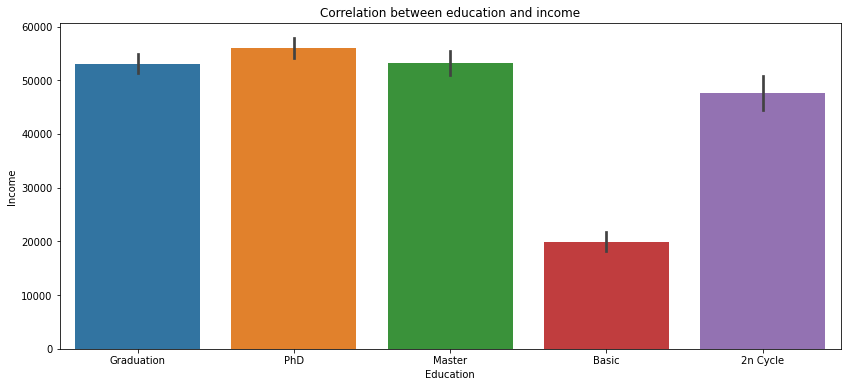

In [98]:
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(data=data, x='Education', y='Income', ax=ax)
ax.set(title='Correlation between education and income')

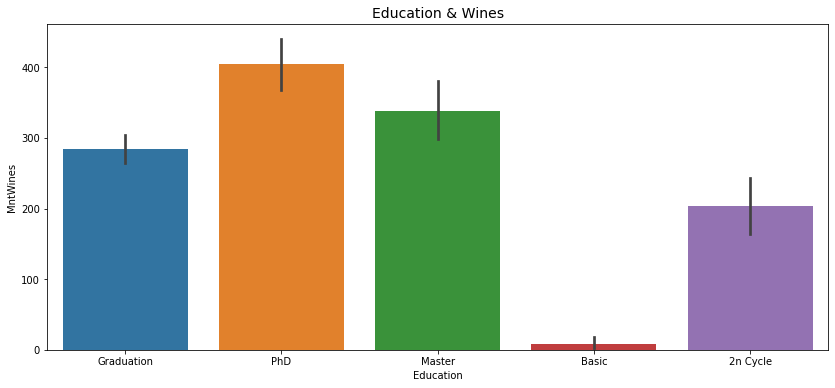

In [99]:
fig, (ax1) = plt.subplots(1, figsize=(14, 6))
sns.barplot(data = data, x = 'Education', y = 'MntWines', ax = ax1)
ax1.set_title('Education & Wines', fontsize= 14)
plt.show()

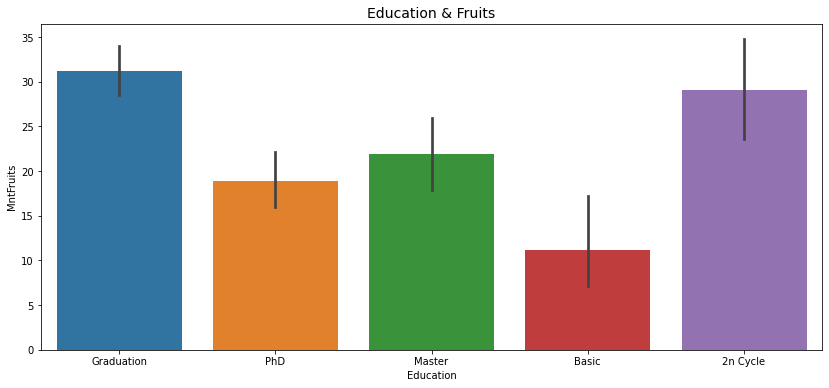

In [100]:
fig, (ax1) = plt.subplots(1, figsize=(14, 6))
sns.barplot(data = data, x = 'Education', y = 'MntFruits', ax = ax1)
ax1.set_title('Education & Fruits', fontsize= 14)
plt.show()

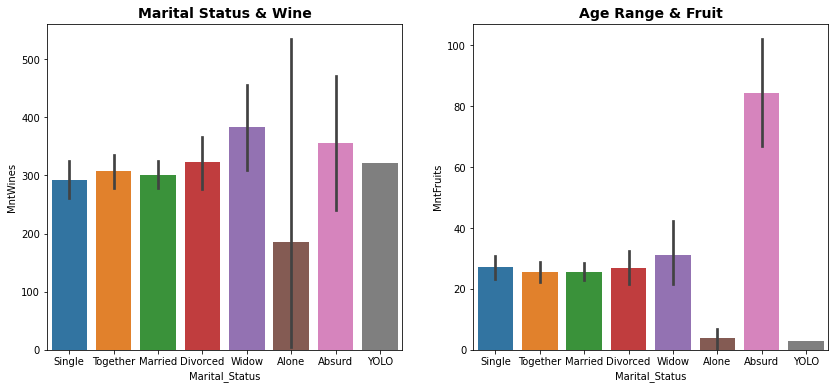

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.set_title('Marital Status & Wine', fontsize= 14, weight = 'bold')
sns.barplot(data = data , x ='Marital_Status', y = 'MntWines', ax = ax1)

sns.barplot(data = data , x ='Marital_Status', y = 'MntFruits', ax = ax2)
ax2.set_title('Age Range & Fruit', fontsize= 14, weight = 'bold')

plt.show()

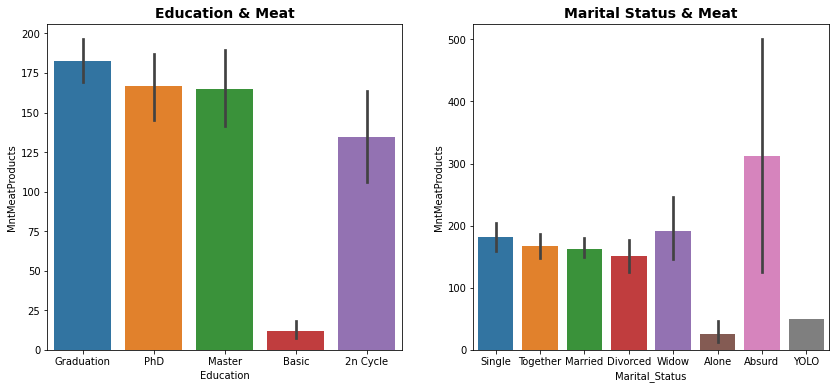

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data = data, x = 'Education', y = 'MntMeatProducts', ax = ax1)
ax1.set_title('Education & Meat', fontsize= 14, weight = 'bold')

sns.barplot(data = data, x = 'Marital_Status', y = 'MntMeatProducts', ax= ax2)
ax2.set_title('Marital Status & Meat', fontsize= 14, weight = 'bold')

plt.show()

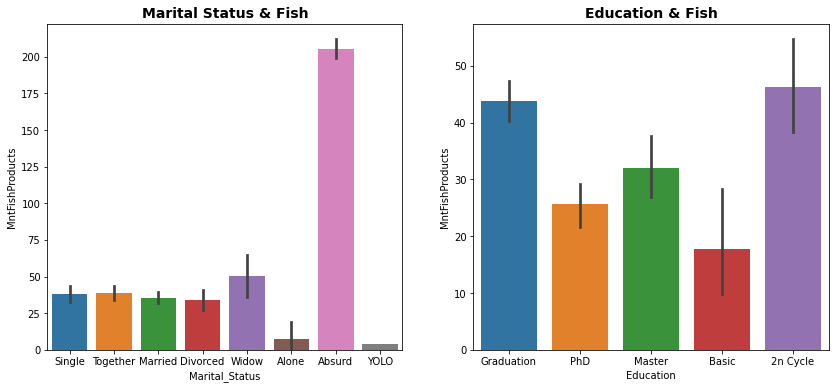

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.set_title('Marital Status & Fish', fontsize= 14, weight = 'bold')
sns.barplot(data = data , x ='Marital_Status', y = 'MntFishProducts', ax = ax1)

sns.barplot(data = data , x ='Education', y = 'MntFishProducts', ax = ax2)
ax2.set_title('Education & Fish', fontsize= 14, weight = 'bold')

plt.show()

In [127]:
def channel(d):
    df_ch = pd.DataFrame((data.loc[:,('NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases')]).melt())
    fig = px.pie(df_ch, values='value', names='variable', width=800, height=400)
    fig.show()
channel(data)

**Data Preprocessing**
________________________________________________________________________________

In [104]:
numerical = ['Age', 'Income', 'NumChildren', 'CustomerFor', 
                      'Recency', 'MntWines', 'MntTotal', 
                      'NumTotalPurchases', 'AcceptedTotal', 'AvgCheck']

In [105]:
corr = data.corr
corr

<bound method DataFrame.corr of        Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
ID                                                                          
5524         1957  Graduation         Single   58138.0        0         0   
2174         1954  Graduation         Single   46344.0        1         1   
4141         1965  Graduation       Together   71613.0        0         0   
6182         1984  Graduation       Together   26646.0        1         0   
5324         1981         PhD        Married   58293.0        1         0   
...           ...         ...            ...       ...      ...       ...   
9432         1977  Graduation       Together  666666.0        1         0   
10870        1967  Graduation        Married   61223.0        0         1   
7270         1981  Graduation       Divorced   56981.0        0         0   
8235         1956      Master       Together   69245.0        0         1   
9405         1954         PhD        Married

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 5524 to 9405
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2034 non-null   int64         
 1   Education            2034 non-null   object        
 2   Marital_Status       2034 non-null   object        
 3   Income               2034 non-null   float64       
 4   Kidhome              2034 non-null   int64         
 5   Teenhome             2034 non-null   int64         
 6   Dt_Customer          2034 non-null   datetime64[ns]
 7   Recency              2034 non-null   int64         
 8   MntWines             2034 non-null   int64         
 9   MntFruits            2034 non-null   int64         
 10  MntMeatProducts      2034 non-null   int64         
 11  MntFishProducts      2034 non-null   int64         
 12  MntSweetProducts     2034 non-null   int64         
 13  MntGoldProds         2034 non-

In [112]:
data = data.drop('Dt_Customer', axis=1)

In [ ]:
#label_encoder = preprocessing.LabelEncoder()
#label_encoder.fit(data['Education'])
#data['Education'] = label_encoder.transform(data['Education'])
#label_encoder.fit(data['Marital_Status'])
#data['Marital_Status'] = label_encoder.transform(data['Marital_Status'])

Get list of categorical variables

In [113]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: []


Label Encoding the object dtypes.

In [114]:
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


Creating a subset of dataframe by dropping the features on deals accepted and promotions

In [128]:
ds = data.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [129]:
scaled_ds.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,labels
0,-0.985832,-0.351952,0.263395,0.226491,-0.826772,-0.931066,0.315957,0.977994,1.551878,1.668188,2.456265,1.467037,0.854261,0.342532,1.415224,2.495392,-0.550393,0.688038,-0.438390
1,-1.236407,-0.351952,0.263395,-0.235644,1.039659,0.900451,-0.374256,-0.872318,-0.636080,-0.713448,-0.647140,-0.630146,-0.730916,-0.174699,-1.124474,-0.568778,-1.168047,-0.132284,-1.079430
2,-0.317633,-0.351952,1.191895,0.754494,-0.826772,-0.931066,-0.788384,0.358258,0.571069,-0.179785,1.342691,-0.148035,-0.034985,-0.691929,1.415224,-0.228315,1.302571,-0.542445,-0.438390
3,1.269340,-0.351952,1.191895,-1.007488,1.039659,-0.931066,-0.788384,-0.872318,-0.560633,-0.651702,-0.501097,-0.581934,-0.750247,-0.174699,-0.761660,-0.909241,-0.550393,0.277877,1.484728
4,1.018766,1.422199,-0.665106,0.232565,1.039659,-0.931066,1.558341,-0.391949,0.420175,-0.219479,0.156095,-0.003401,-0.556933,1.376993,0.326782,0.112149,0.067262,-0.132284,-0.438390


**Dimensionality Reduction**
________________________________________________________________________________

Initiating PCA to reduce dimentions aka features to 3

In [132]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2034.0,-3.231328e-17,2.457405,-5.060732,-2.274665,-0.621482,2.110321,6.553608
col2,2034.0,2.368912e-17,1.501183,-3.026898,-1.240543,-0.085247,1.176720,4.539473
col3,2034.0,-2.647287e-17,1.170785,-4.315519,-0.801495,-0.015987,0.694738,5.464435


3D Projection Of Data In The Reduced Dimension

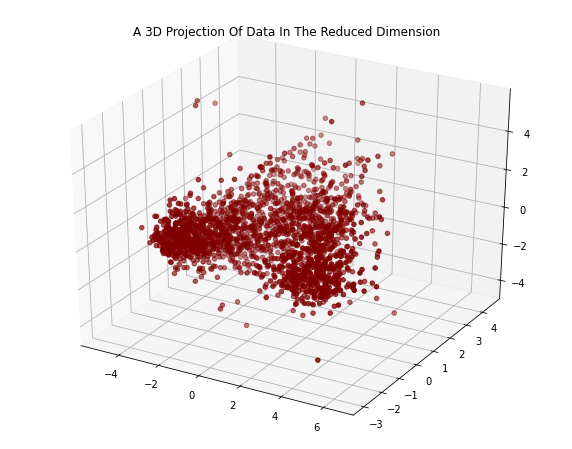

In [133]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Quick examination of elbow method to find numbers of clusters to make

**Clustering**
________________________________________________________________________________

Elbow Method to determine the number of clusters to be formed:


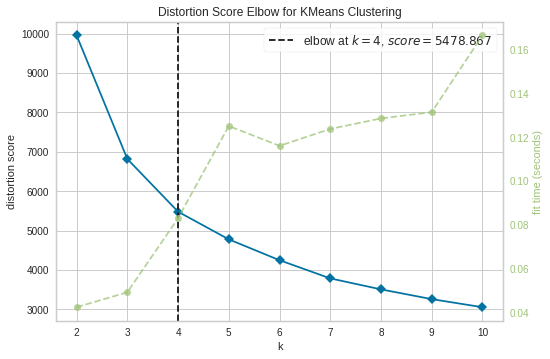

In [136]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

Initiating the Agglomerative Clustering model 

In [139]:
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

Plotting the clusters

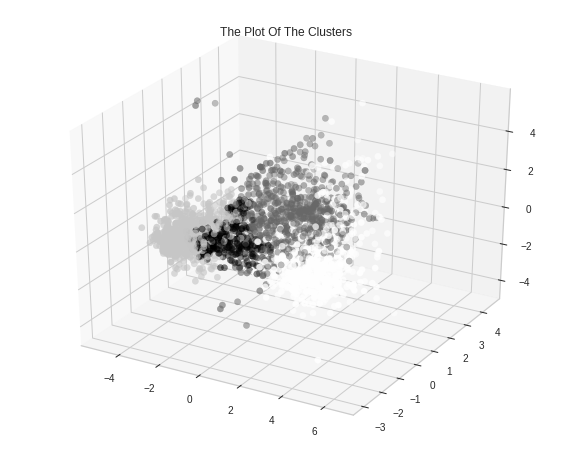

In [141]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

Plotting countplot of clusters

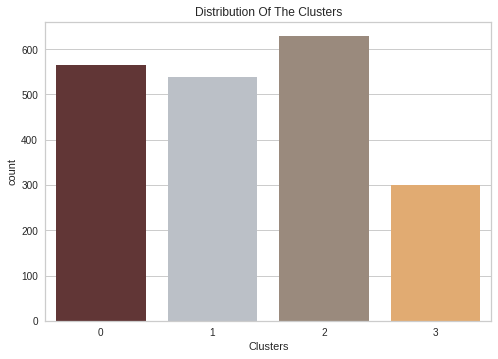

In [145]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()